In [97]:
#importing required pacakages

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [13]:
#Load the excel dataset
insurance_df= pd.read_excel("Health_insurance_cost.xlsx")

In [98]:
insurance_df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,25.830,0,1,1,16884.92400
1,18.0,1,33.770,1,0,0,1725.55230
2,28.0,1,33.000,3,0,0,4449.46200
3,33.0,1,22.705,0,0,4,21984.47061
4,32.0,1,28.880,0,0,4,3866.85520


In [15]:
print(f"Number of Rows = {insurance_df.shape[0]}")
print(f"Number of columns = {insurance_df.shape[1]}")

Number of Rows = 1338
Number of columns = 7


In [16]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


**Categorical Features**

1.Gender

2.Location

3.Smoking Status

In [17]:
#dropping the duplicate values
insurance_df= insurance_df.drop_duplicates()

In [18]:
#checking duplicates rows
insurance_df[insurance_df.duplicated()]

,age,gender,BMI,Children,smoking_status,location,health_insurance_price


In [19]:
#infomation about the dataset
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1309 non-null   float64
 1   gender                  1337 non-null   object 
 2   BMI                     1314 non-null   float64
 3   Children                1337 non-null   int64  
 4   smoking_status          1337 non-null   object 
 5   location                1337 non-null   object 
 6   health_insurance_price  1335 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 83.6+ KB


In [20]:
insurance_df.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

**Null value containing columns:- Age(28), BMI(23), Insurance_price(2)**

In [21]:
#rows containing NAN values
insurance_df[insurance_df.isnull().any(axis=1)]

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
26,NaN,female,23.085,0,no,northeast,14451.83515
59,34.0,female,NaN,2,no,northwest,5989.52365
80,NaN,male,26.885,1,no,northeast,4441.21315
107,26.0,male,NaN,2,no,northwest,3877.30425
130,59.0,female,NaN,0,no,northeast,12815.44495
138,NaN,female,31.900,3,no,southeast,27322.73386
159,50.0,female,NaN,3,no,southeast,19749.38338
214,NaN,female,30.900,2,no,southwest,8520.02600
250,18.0,male,NaN,2,yes,northeast,12829.45510


In [22]:
#seprately extracting rows containing value NAN values in 'price' column for later prediction
for_test= insurance_df[insurance_df["health_insurance_price"].isnull()]

In [23]:
for_test

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1281,47.0,female,27.645,2,yes,northwest,NaN
1312,34.0,male,42.900,1,no,southwest,NaN


In [24]:
insurance_df= insurance_df.dropna(subset=["health_insurance_price"])

In [25]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1335 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1307 non-null   float64
 1   gender                  1335 non-null   object 
 2   BMI                     1312 non-null   float64
 3   Children                1335 non-null   int64  
 4   smoking_status          1335 non-null   object 
 5   location                1335 non-null   object 
 6   health_insurance_price  1335 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 83.4+ KB


In [26]:
#statitstical measure of dataset
insurance_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1307.0,NaN,NaN,NaN,39.179801,14.058038,18.0,26.0,39.0,51.0,64.0
gender,1335,2,male,674,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMI,1312.0,NaN,NaN,NaN,30.631189,6.107345,15.96,26.195,30.305,34.58,53.13
Children,1335.0,NaN,NaN,NaN,1.095131,1.206218,0.0,0.0,1.0,2.0,5.0
smoking_status,1335,2,no,1062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,1335,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
health_insurance_price,1335.0,NaN,NaN,NaN,13277.238554,12113.150034,1121.8739,4746.69845,9386.1613,16622.10758,63770.42801


In [27]:
insurance_df["age"].value_counts()

age
18.0    68
19.0    66
50.0    29
20.0    29
46.0    29
48.0    29
27.0    28
51.0    28
49.0    28
53.0    28
26.0    28
22.0    28
24.0    28
28.0    28
23.0    28
45.0    27
21.0    27
30.0    27
42.0    27
52.0    27
47.0    27
54.0    27
43.0    27
40.0    27
44.0    26
56.0    26
29.0    26
41.0    26
25.0    26
57.0    25
33.0    25
31.0    25
58.0    25
37.0    25
36.0    25
38.0    25
59.0    25
39.0    25
35.0    24
32.0    24
55.0    24
34.0    24
61.0    23
60.0    23
64.0    22
62.0    22
63.0    21
Name: count, dtype: int64

In [28]:
condition_list=[(insurance_df["age"]>=18) & (insurance_df["age"]<31),
               (insurance_df["age"]>= 31) & (insurance_df["age"]<46),
               (insurance_df["age"]>45) &(insurance_df["age"]<=55),
               (insurance_df["age"]>55)]
value_list=["Young Adults","Middle Age Adults","Emerging Seniors","Seniors"]

insurance_df["Age_category"]= np.select(condition_list,value_list,'NaN')

insurance_df.head(2)


,age,gender,BMI,Children,smoking_status,location,health_insurance_price,Age_category
0,19.0,female,NaN,0,yes,southwest,16884.9240,Young Adults
1,18.0,male,33.77,1,no,southeast,1725.5523,Young Adults


**Grouping the Given Ages into 4 groups**

Young Adults: 18-30

Middle-Age Adults: 31-45

Emerging Seniors: 46-55

Seniors: 56+

In [29]:
condition_list=[(insurance_df["BMI"]<18.5),
               (insurance_df["BMI"]>=18.5) & (insurance_df["BMI"]<25.0),
               (insurance_df["BMI"]>=25.0) &(insurance_df["BMI"]<=29.9),
               (insurance_df["BMI"]>=30.0) &(insurance_df["BMI"]<=39.9),
               (insurance_df["BMI"]>=40.0)]
value_list=["Underweight","Normal","overweight","Obese","Extremely Obese"]

insurance_df["BMI_category"]= np.select(condition_list,value_list,"Nan")

insurance_df.head(2)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price,Age_category,BMI_category
0,19.0,female,NaN,0,yes,southwest,16884.9240,Young Adults,Nan
1,18.0,male,33.77,1,no,southeast,1725.5523,Young Adults,Obese


**Weight Status of Person according to BMI value**

Underweight: <18.5

Normal: 18.5- 25.0

Overweight: 25.0- 29.9

Obese: 30-39.9

Extremely Obese: >=40

In [30]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1335 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1307 non-null   float64
 1   gender                  1335 non-null   object 
 2   BMI                     1312 non-null   float64
 3   Children                1335 non-null   int64  
 4   smoking_status          1335 non-null   object 
 5   location                1335 non-null   object 
 6   health_insurance_price  1335 non-null   float64
 7   Age_category            1335 non-null   object 
 8   BMI_category            1335 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 104.3+ KB


***Data Exploratory Analysis***

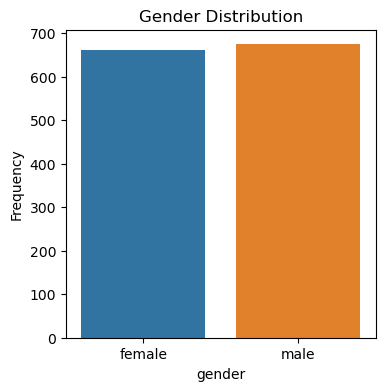


gender
male      674
female    661
Name: count, dtype: int64


In [31]:
# distribution of gender

plt.figure(figsize=(4,4))
sns.countplot(data=insurance_df,x="gender")
plt.title("Gender Distribution")
plt.ylabel("Frequency")
plt.show()


print()
#value of counts of male and female
print(insurance_df["gender"].value_counts())

**We can observe the distribution of number of males(674) and females(661) is very balanced**

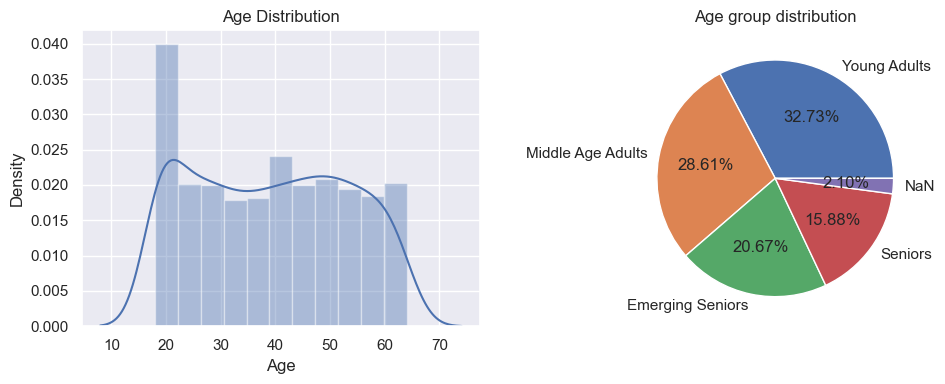

In [32]:
#Distribution of age

plt.figure(figsize=(10,4))


sns.set()
plt.subplot(1,2,1)
sns.distplot(insurance_df["age"])
plt.title("Age Distribution")
plt.xlabel("Age")

plt.subplot(1,2,2)
plt.pie(insurance_df["Age_category"].value_counts(),labels=insurance_df["Age_category"].value_counts().index,
       autopct='%2.2f%%')
plt.title("Age group distribution")

plt.tight_layout()
plt.show()


***Category distribution***

Young Adults: 32%

Middle-Age Adults: 28%

Emerging Seniors: 26%

Seniors: 16%

Null Values: 2%

**We can observe age distribution is seem uniform, but there's a high concentration of people of age between 18 to 23.**

**Here minimum age is (18) and maximum age is (64)**

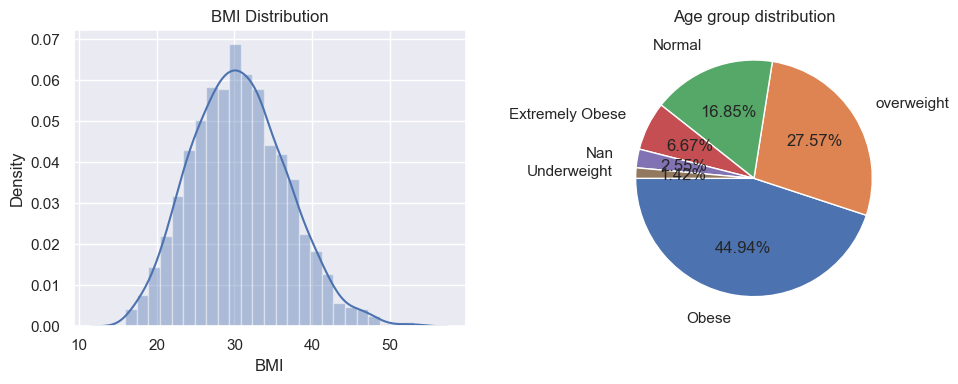

In [33]:
plt.figure(figsize=(10,4))
#Disribution of BMI of Population

sns.set()
plt.subplot(1,2,1)
sns.distplot(insurance_df["BMI"])
plt.title("BMI Distribution")
plt.xlabel("BMI")

plt.subplot(1,2,2)
plt.pie(insurance_df["BMI_category"].value_counts(),labels=insurance_df["BMI_category"].value_counts().index,
       autopct='%2.2f%%',startangle=180,labeldistance=1.2)
plt.title("Age group distribution")

plt.tight_layout()
plt.show()

**We can observe the normal distribution from above plot.**

***Other Insights***

>We can observe the number of the people With BMI near to 30 in the lesson or greater than it's very high, which means. that the higher population of this data is either obese or overweight.

>Roughly 2% people are underweight i.e, thier BMI must be less than 18.5

>From previous observation, we have seen that the high number of people lie between the age of 18 to 30 which provide strong evidence that a high concentration of young adults and middle age adults is either obese or overweight.

>Average BMI of given population is ~30.0 and max BMI is ~53.0

In [34]:
insurance_df["Children"].value_counts()

Children
0    573
1    323
2    239
3    157
4     25
5     18
Name: count, dtype: int64

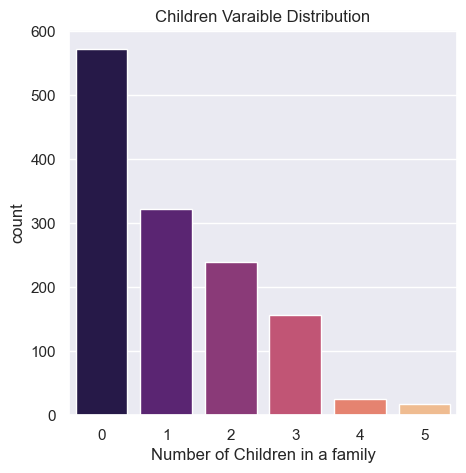

In [35]:
#Visualizing the Children count
sns.set()
plt.figure(figsize=(5,5))
sns.countplot(data=insurance_df,x="Children",palette="magma")
plt.title("Children Varaible Distribution")
plt.xlabel("Number of Children in a family")
plt.show()

*Number of People(~573) with no child is very  high comparatively*

*In dataset only 18 people have 5 children in thier family*

In [36]:
print("Value counts of smoker Status")
print(insurance_df["smoking_status"].value_counts())

print()
print("Value counts of Different Location")
print(insurance_df["location"].value_counts())

Value counts of smoker Status
smoking_status
no     1062
yes     273
Name: count, dtype: int64

Value counts of Different Location
location
southeast    364
southwest    324
northeast    324
northwest    323
Name: count, dtype: int64


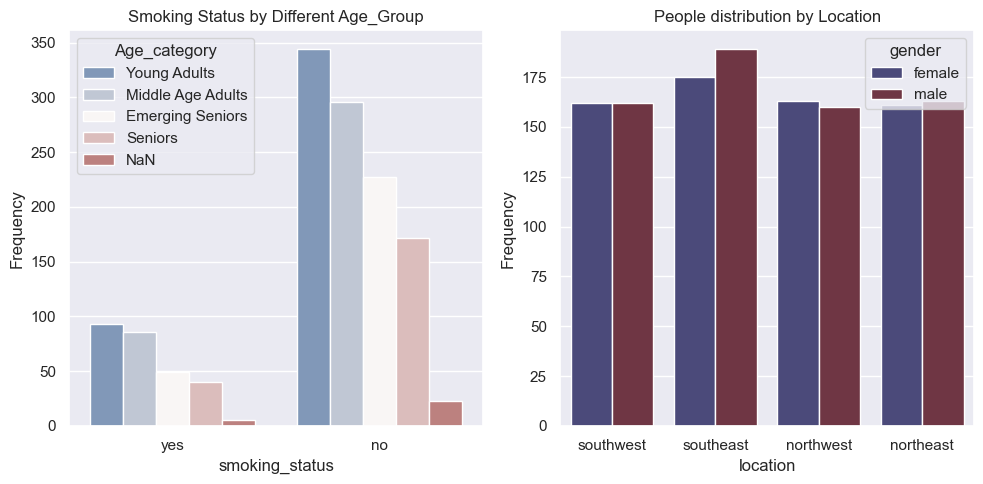

In [37]:
#Distribution of Smoker and People Region Location

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=insurance_df,x="smoking_status",palette="vlag",hue="Age_category")
plt.title("Smoking Status by Different Age_Group")
plt.ylabel("Frequency")


plt.subplot(1,2,2)
sns.countplot(data= insurance_df, x="location",palette='icefire',hue="gender")
plt.ylabel("Frequency")
plt.title("People distribution by Location")

plt.tight_layout()
plt.show()

**Observation**

1.We can observe number of non-smokers is very higher than the number of smoking people.Number of Smoker(102) while the number of Non_Smoker(1062).

>The number of people smoking an age between 19 to 23 is very high comparatively to the other old age people.

2.We can look the number of regions given in given set is SW SE NE and NW.It can be seen distribution of number of people living in these regions is very balanced.

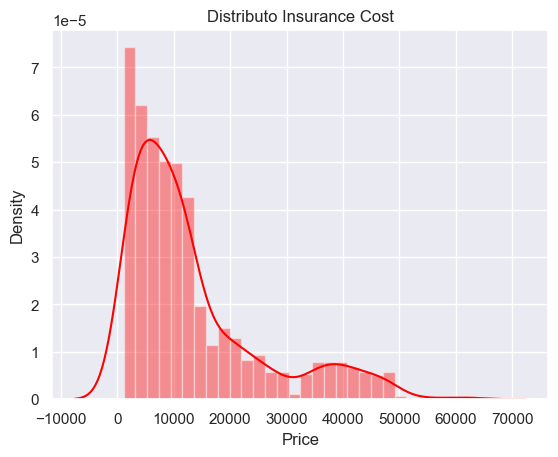

In [38]:
#health_insurance_price distribution
sns.set()
sns.distplot(insurance_df["health_insurance_price"],color="red")
plt.title("Distributo Insurance Cost")
plt.xlabel("Price")
plt.show()

Most of the health insurance cost up to $10,000.

We can observe few health insurance costing between 20 to 30 thousand dollar.Few costs greater than or equal to $40,000.

Co-relation between Price and BMI- 0.1974232407441377



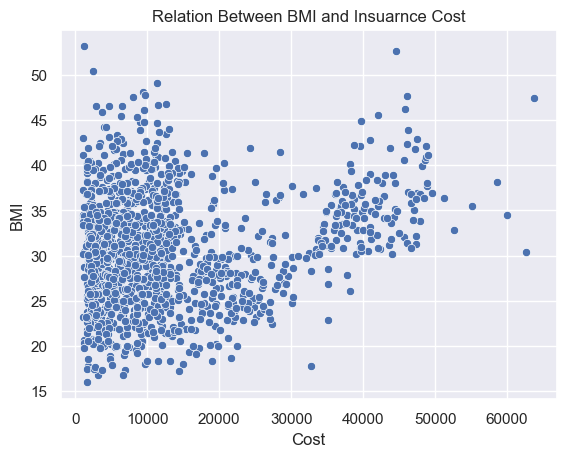

In [39]:
sns.scatterplot(data=insurance_df,x="health_insurance_price",y='BMI')
plt.title("Relation Between BMI and Insuarnce Cost")
plt.xlabel("Cost")


print("Co-relation between Price and BMI-",insurance_df["health_insurance_price"].corr(insurance_df["BMI"]))
print()


*The correlation between the "health_insurance_price" and "BMI" columns is approximately 0.1974, indicating a weak positive correlation. This suggests that there is a slight tendency for health insurance prices to increase with higher BMI values, but the relationship is not very strong*

>**Data preprocessing and Handling values.**

In [40]:
insurance_df.drop(columns=["Age_category","BMI_category"],inplace=True)
insurance_df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


**Nominal Feature**- Gender, Smoking_status, Location

**Continous Feature**-  BMI, Insurance_Price

**Ordinal Feature**- Children Counts

**Discrete Feature**- Age

In [41]:
#Encoding Nominal Values
#using pandas (.replace()) method

#Gender column
insurance_df.replace({"gender":{'female':0,'male':1}},inplace=True)

#Smoking Status column
insurance_df.replace({'smoking_status':{'no':0,'yes':1}},inplace=True)

#location column
insurance_df.replace({'location':{'southeast':0,'southwest':1,"northeast":3,"northwest":4}},inplace=True)

insurance_df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,NaN,0,1,1,16884.92400
1,18.0,1,33.770,1,0,0,1725.55230
2,28.0,1,33.000,3,0,0,4449.46200
3,33.0,1,22.705,0,0,4,21984.47061
4,32.0,1,28.880,0,0,4,3866.85520


***KNN Imputer method to impute the AGE and BMI column***

In [42]:
#cosnidering other varaibles imapact ,imputing the null values of Age,BMI feature by KNN Imputer
from sklearn.impute import KNNImputer

df=insurance_df[["age","BMI"]]
imputer = KNNImputer(n_neighbors=5)

imputed_df = imputer.fit_transform(df)

#replacing original valus by imputed value
insurance_df["age"] = imputed_df[:,0]
insurance_df["BMI"] = imputed_df[:,1]

In [43]:
#checking if any null value contaning row is present or not
insurance_df[insurance_df.isnull().any(axis=1)]

,age,gender,BMI,Children,smoking_status,location,health_insurance_price


In [44]:
insurance_df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,25.830,0,1,1,16884.92400
1,18.0,1,33.770,1,0,0,1725.55230
2,28.0,1,33.000,3,0,0,4449.46200
3,33.0,1,22.705,0,0,4,21984.47061
4,32.0,1,28.880,0,0,4,3866.85520


In [45]:
hypo_df=insurance_df.copy()

**DATA SPLIT FOR MODEL TRAINING AND TESTING**

In [46]:
X= insurance_df.drop(columns=["health_insurance_price"])
y= insurance_df["health_insurance_price"]
X.head()

,age,gender,BMI,Children,smoking_status,location
0,19.0,0,25.830,0,1,1
1,18.0,1,33.770,1,0,0
2,28.0,1,33.000,3,0,0
3,33.0,1,22.705,0,0,4
4,32.0,1,28.880,0,0,4


In [47]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: health_insurance_price, dtype: float64

In [48]:
#splitting the dataset in 80-20% train test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1068, 6) (267, 6) (1068,) (267,)


In [49]:
#importing Model classes for model training
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [50]:
#creating object of repective model class
linear_model= LinearRegression()
decision_model= DecisionTreeRegressor()
random_model= RandomForestRegressor()
svm_model= SVR()
knn_model= KNeighborsRegressor()
xgb_model= XGBRegressor()

In [51]:
#fitting training data
linear_model.fit(X_train,y_train)
decision_model.fit(X_train,y_train)
random_model.fit(X_train,y_train)
svm_model.fit(X_train,y_train)
knn_model.fit(X_train,y_train)
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [52]:
#predicting the values using trained model
y_pred_linear= linear_model.predict(X_test)
y_pred_Decision= decision_model.predict(X_test)
y_pred_random= random_model.predict(X_test)
y_pred_svm= svm_model.predict(X_test)
y_pred_knn= knn_model.predict(X_test)
y_pred_xgb= xgb_model.predict(X_test)

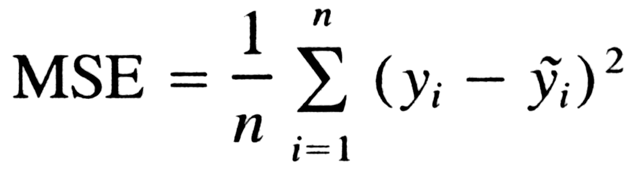

In [53]:
#Mean_square_error Of each trained model
print("Mean_square_error of Linear Regression Model is",mean_squared_error(y_test,y_pred_linear))
print()
print("Mean_square_error of Decision Tree Regressor Model is",mean_squared_error(y_test,y_pred_Decision))
print()
print("Mean_square_error of Random forest Regressor Model is",mean_squared_error(y_test,y_pred_random))
print()
print("Mean_square_error of SVR Model is",mean_squared_error(y_test,y_pred_svm))
print()
print("Mean_square_error of KNN Regressor Model is",mean_squared_error(y_test,y_pred_knn))
print()
print("Mean_square_error of XGB Regressor Model is",mean_squared_error(y_test,y_pred_xgb))

Mean_square_error of Linear Regression Model is 42149142.88998003

Mean_square_error of Decision Tree Regressor Model is 49838842.93283114

Mean_square_error of Random forest Regressor Model is 26091834.47845104

Mean_square_error of SVR Model is 201216430.7807892

Mean_square_error of KNN Regressor Model is 159497227.3224363

Mean_square_error of XGB Regressor Model is 30757124.434786074


Based on the MSE values, the Random Forest Regressor model has the lowest MSE (25724663.55343095), followed by the XGB Regressor model (30757124.434786074).

**Lower the value better the model prediction perfomance**

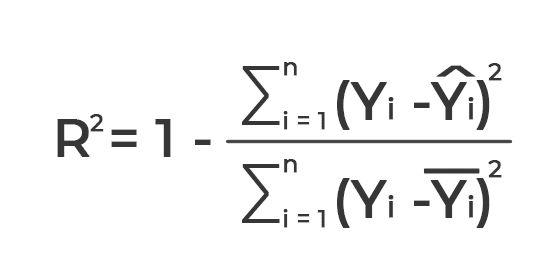

In [54]:
#R2_score Of each trained model
print("R2_score of Linear Regression Model is",r2_score(y_test,y_pred_linear))
print()
print("R2_score of Decision Tree Regressor Model is",r2_score(y_test,y_pred_Decision))
print()
print("R2_score of Random forest Regressor Model is",r2_score(y_test,y_pred_random))
print()
print("R2_score of SVR Model is",r2_score(y_test,y_pred_svm))
print()
print("R2_score of KNN Regressor Model is",r2_score(y_test,y_pred_knn))
print()
print("R2_score of XGB Regressor Model is",r2_score(y_test,y_pred_xgb))

R2_score of Linear Regression Model is 0.7547925792660716

R2_score of Decision Tree Regressor Model is 0.7100568768427289

R2_score of Random forest Regressor Model is 0.8482077927093858

R2_score of SVR Model is -0.17059941479317087

R2_score of KNN Regressor Model is 0.0721067845190958

R2_score of XGB Regressor Model is 0.8210669390945247


**R2 evaluation matric is a coefficient of fitness of model. It tells us about the variance in target variable given by dependent variable.**

Based on the  obtained metric result, we can conclude that random forest regressor and XEboost regressor is performing better than any other model.

In [55]:
#Observing Actual value vs model predicted value by Visualisisng in DataFrame

Actual_vs_Predicted= pd.DataFrame({"Actual":y_test,"LinearR":y_pred_linear,
                                   "DecisionR":y_pred_Decision,"RandomR":y_pred_random,"SVR":y_pred_svm,"KNNR":y_pred_knn,"XGBR":y_pred_xgb})
Actual_vs_Predicted

,Actual,LinearR,DecisionR,RandomR,SVR,KNNR,XGBR
1017,3987.92600,6474.685419,4391.65200,5344.134733,9153.394618,12686.224458,3613.196777
445,7345.08400,7852.221089,4646.75900,6551.422439,9217.559022,5621.087800,8511.162109
458,10601.41200,14454.437652,10594.22570,10822.645607,9337.715190,12866.597168,11231.013672
251,47305.30500,39125.699973,46718.16325,46779.603901,9367.705134,23345.655826,47225.726562
981,4500.33925,3943.332341,5125.21570,7923.586101,9191.962593,8676.283922,8802.491211
...,...,...,...,...,...,...,...
806,28476.73499,11924.357292,7443.64305,7361.519958,9240.475539,8389.408600,8299.023438
884,4877.98105,5701.359107,17128.42608,12596.224291,9146.452256,9647.892800,9739.302734
194,1137.46970,3266.761173,1137.01100,1357.665244,9127.164688,3323.905190,853.715027
240,38511.62830,30650.827423,37484.44930,37068.373912,9144.093400,2998.861870,40425.125000


**Comparing visually the Prediction perfomance of model visually**

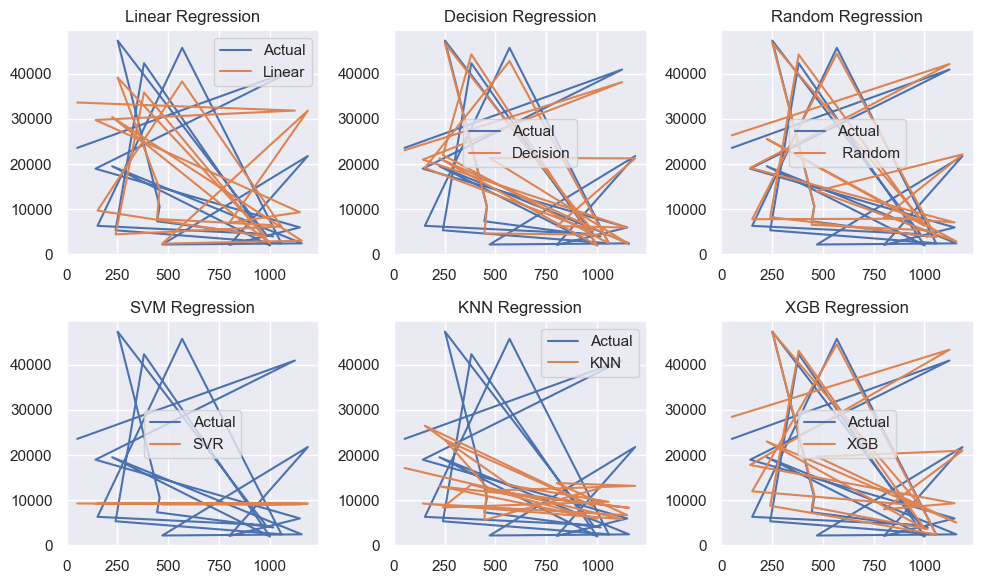

In [56]:
#Plot the actual vs predicted values of first 20 entries
plt.figure(figsize=(10,6))

plt.subplot(2,3,1)
plt.plot(Actual_vs_Predicted.index[:20], Actual_vs_Predicted["Actual"][:20], label="Actual")
plt.plot(Actual_vs_Predicted.index[:20], Actual_vs_Predicted["LinearR"][:20], label="Linear")
plt.legend()
plt.title("Linear Regression")

plt.subplot(2,3,2)
plt.plot(Actual_vs_Predicted.index[:20], Actual_vs_Predicted["Actual"][:20], label="Actual")
plt.plot(Actual_vs_Predicted.index[:20], Actual_vs_Predicted["DecisionR"][:20], label="Decision")
plt.legend()
plt.title("Decision Regression")

plt.subplot(2,3,3)
plt.plot(Actual_vs_Predicted.index[:20], Actual_vs_Predicted["Actual"][:20], label="Actual")
plt.plot(Actual_vs_Predicted.index[:20], Actual_vs_Predicted["RandomR"][:20], label=" Random")
plt.legend()
plt.title("Random Regression")

plt.subplot(2,3,4)
plt.plot(Actual_vs_Predicted.index[:20], Actual_vs_Predicted["Actual"][:20], label="Actual")
plt.plot(Actual_vs_Predicted.index[:20], Actual_vs_Predicted["SVR"][:20], label="SVR")
plt.legend()
plt.title("SVM Regression")

plt.subplot(2,3,5)
plt.plot(Actual_vs_Predicted.index[:20], Actual_vs_Predicted["Actual"][:20], label="Actual")
plt.plot(Actual_vs_Predicted.index[:20], Actual_vs_Predicted["KNNR"][:20], label="KNN")
plt.legend()
plt.title("KNN Regression")

plt.subplot(2,3,6)
plt.plot(Actual_vs_Predicted.index[:20], Actual_vs_Predicted["Actual"][:20], label="Actual")
plt.plot(Actual_vs_Predicted.index[:20], Actual_vs_Predicted["XGBR"][:20], label="XGB")
plt.legend()
plt.title("XGB Regression")

plt.tight_layout()
plt.show()

>***Choosing Random Forest Regressor as Final Model***

**Name of model**-*random_model(Random Forest Regressor)*

Given your focus on avoiding overfitting and the slightly higher R-squared value of 0.85 for Random Forest compared to 0.82 for XGBoost on your small dataset, Random Forest may be the better choice for your current needs. Its ability to handle overfitting well, coupled with its simpler hyperparameter tuning process and interpretability, makes it a suitable candidate for your regression problem.

Also from above plot it can be observed that a better overlapping of actaul and predicted line which shows that Random Forest Regressor model is predicting value most near to actual

In [57]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(random_model,X_train,y_train,scoring="r2",cv=5)
print(cv_score)
print(cv_score.mean())

[0.83589405 0.74188564 0.76798358 0.83709292 0.84098737]
0.804768714321815


**Building a predictive system**

In [58]:
#randomly choose single entry to test
hypo_df.iloc[10,:]

age                         25.0000
gender                       1.0000
BMI                         26.2200
Children                     0.0000
smoking_status               0.0000
location                     3.0000
health_insurance_price    2721.3208
Name: 10, dtype: float64

In [59]:
#create a dataframe of single entry
#'female':0,'male':1 #'smoking_status':'no':0,'yes':1 #'southeast':0,'southwest':1,"northeast":3,"northwest":4

test={'age':25.0,"gender":1,'BMI':26.22,'Children':0,'smoking_status':0,"location":3}
test_df=pd.DataFrame(test,index=[0])
test_df

,age,gender,BMI,Children,smoking_status,location
0,25.0,1,26.22,0,0,3


In [60]:
new_pred_price= random_model.predict(test_df)
new_pred_price

array([2784.1665247])

The predicted value(2676.846755) is very close to the actual value(2721.3208)

From this we can conclude that model is performing pretty good. We can see that the predicted value is very close to the actual value.

In [61]:
#Testing value
for_test

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1281,47.0,female,27.645,2,yes,northwest,NaN
1312,34.0,male,42.900,1,no,southwest,NaN


**Utilizing previously extracted rows where health insurance prices is NAN to predict the health insurance cost with selected random forest regressive model.**

In [62]:
#predicting price of non smoker male(34) of BMI(42.900) having one child
x1=(34,1,42.900,1,0,1)
input1= np.asarray(x1)
input1= input1.reshape(1,-1)



#predicting price of smoker female(47) of BMI-(27.645) having two child
x2=(47,0,27.645,2,1,4)
input2= np.asarray(x2)
input2= input2.reshape(1,-1)


insurance_cost1= random_model.predict(input1)
insurance_cost2= random_model.predict(input2)

print(insurance_cost1)
print(insurance_cost2)

[9981.9165665]
[24301.4707503]


## Saving Model

In [64]:
#trainng model on entire set 
random_model.fit(X,y)

RandomForestRegressor()

In [63]:
import joblib

In [66]:
joblib.dump(random_model,"Insurance Price")

['Insurance Price']

In [69]:
#loading the saved model
model = joblib.load("Insurance Price")

In [83]:
#testing saved model price prediction on fetched rows  
insurance_df.iloc[1330:1332,:]

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1333,50.0,1,30.97,3,0,4,10600.5483
1334,18.0,0,31.92,0,0,3,2205.9808


In [92]:
#enter info of two person 

#increase more entries in dictionary to get predicted price  
input_data= {"age":[50.0,18.0],"gender":[1,0],
            "BMI":[30.97,31.92],"Children":[3,0],
            "smoking_status":[0,0],"location":[4,3]}

#transforming to data frame 
df= pd.DataFrame(input_data)

#Giving values to model to predict
random_model.predict(df)

array([11910.815732  ,  2266.35339883])

1.**Actaul** Insurance Price of male aging 50 is with is **10600.5483** while **Predicted** is **11910.815732**

2.**Actaul** Insurance Price of female aging 18 is with is **2205.9808** while **Predicted** is **2266.35339883**

The predicted insurance prices are close to the actual prices for both demographic groups. This suggests that the model is performing well in predicting insurance prices for these individuals.

However,it seems that the predicted insurance prices are slightly higher than the actual prices, this could indicate that the model is slightly overestimating the insurance prices for these demographic groups.

## GUI

In [131]:
from tkinter import *
#assigning main window of interphase to 'window' varaible
window = Tk()

window.title("Health Insurance Price Prediction")
label= Label(window,text="Health Insurance Price",bg="green",fg="white")
label.grid(row=0,columnspan=2)


#set required enter value lables 
Label(window,text="Enter Your Age").grid(row=1)
Label(window,text="Gender Male or Female [1/0]").grid(row=2)
Label(window,text="Enter Your BMI Value").grid(row=3)
Label(window,text="Number of Children [0/1/2/3/4/5]").grid(row=4)
Label(window,text="Smoking Yes or No [1/0]").grid(row=5)
Label(window,text="Loaction [1/2/3/4]").grid(row=6)


#setting 'window' to take input values 
i1= Entry(window)
i2= Entry(window)
i3= Entry(window)
i4= Entry(window)
i5= Entry(window)
i6= Entry(window)

i1.grid(row=1,column=1)
i2.grid(row=2,column=1)
i3.grid(row=3,column=1)
i4.grid(row=4,column=1)
i5.grid(row=5,column=1)
i6.grid(row=6,column=1)


#Defining function to 'GET' value and for Button to predict cost
def take_input():
    
    #assign predictors
    predict_1= float(i1.get())
    predict_2= float(i2.get())
    predict_3= float(i3.get())
    predict_4= float(i4.get())
    predict_5= float(i5.get())
    predict_6= float(i6.get())
    
    #using trained model to get price
    result= random_model.predict([[predict_1,predict_2,predict_3,predict_4,predict_5,predict_6]])
    
    Label(window,text="Insurance Cost").grid(row=7)
    #setting label of result 
    Label(window,text=result).grid(row=7,column=1)

    
#setting Button for window interphase
Button(window, text="Predict",command=take_input).grid(row=8)


#Tk event loop. This function call GUI window and keep open Till user exit  
window.mainloop() 

**Run above code cell to open event loop i.e, graphic interphase then enter values to retrive insurance price prediction by pressing button 'predict'**